In [4]:
wav,sr=librosa.load("marry1.wav",sr=44100)

C:\Users\sihn6\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


FileNotFoundError: [Errno 2] No such file or directory: 'marry1.wav'

<Figure size 432x288 with 0 Axes>

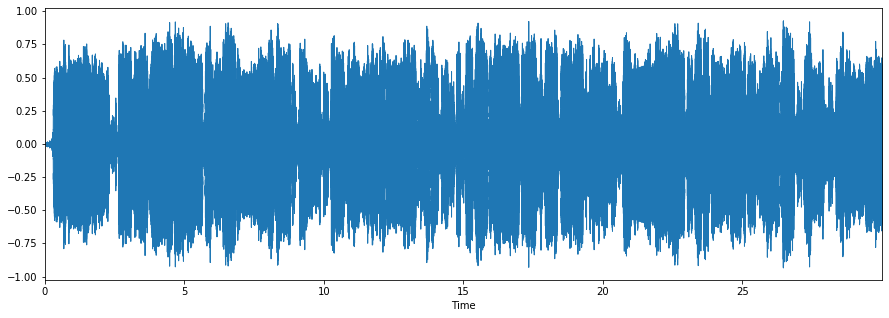

In [12]:
#周波数を可視化
plt.figure()
plt.figure(figsize=(15,5))
librosa.display.waveplot(wav,sr)

In [13]:
S = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128,hop_length=2048,n_fft=2048,fmax=8192)

In [14]:
log_S = librosa.amplitude_to_db(S, ref=np.max)

In [26]:
y[1300:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

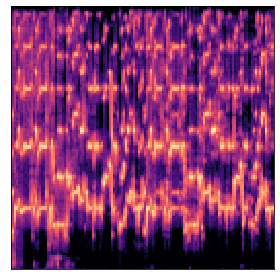

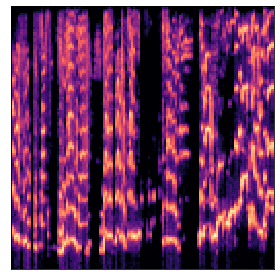

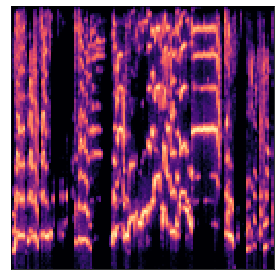

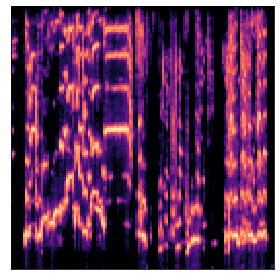

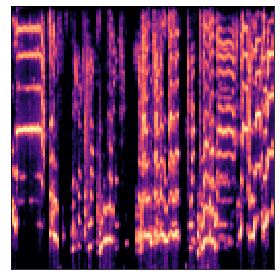

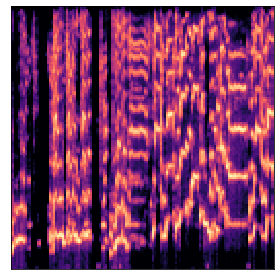

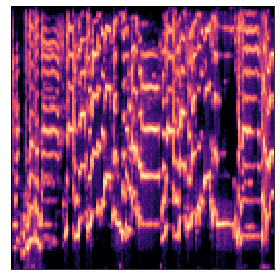

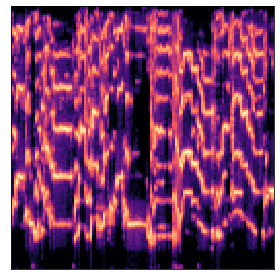

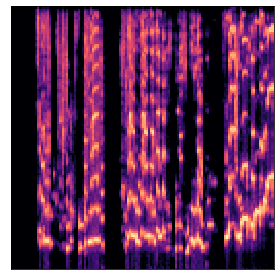

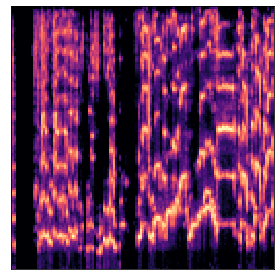

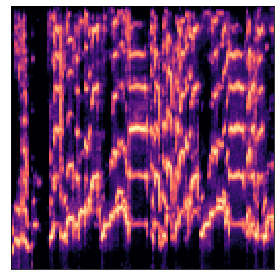

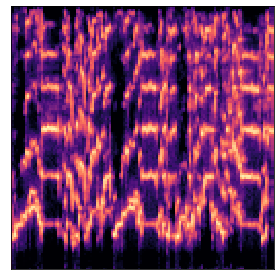

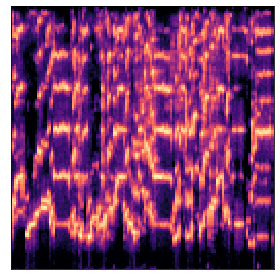

In [28]:
for i  in range(1100,1113):
    plt.figure(figsize=(4,4))
    librosa.display.specshow(x[i,:,:], sr=4410)
    plt.tight_layout()

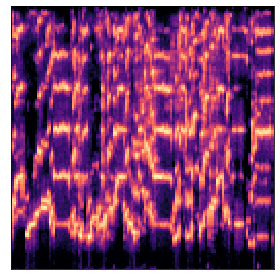

In [30]:
plt.figure(figsize=(4,4))
librosa.display.specshow(x[1363,:,:], sr=44100)
plt.tight_layout()

In [5]:
#wavファイルのリストからメス周波数スペクトルをそれぞれ取得し配列にする
def ar(list):
    a=np.empty([1,128,128])
    for l in list:
        e=to_mel(l)
        f=e[np.newaxis,:,:]
        a=np.concatenate([a,f],0)
    a=a[1:,:,:]
    return a

In [7]:
n_mels=128
# hop_length is number of samples between successive frames.
hop_length=1034
# n_fft is length of the FFT window
n_fft=2048
# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)

log_S = librosa.power_to_db(S, ref=np.max)
print(log_S.shape)

plt.figure(figsize=(12, 4))
librosa.display.specshow(data=log_S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

NameError: name 'y' is not defined

In [ ]:
#mp3ファイルの時間によって無音部分を省くための処理
def divide_song(path,a,b,c):
    sound = pydub.AudioSegment.from_mp3(path)
    sound_split=sound[a*1000:(b*60000+c*1000)]
    sound_split.export(path,format="mp3")

In [6]:
#mp3ファイルをwavファイルに変換して分割。分割は 10秒ずつずらしながら30秒ごとに区切って行う
def to_wav2(path):
    sound = pydub.AudioSegment.from_mp3(path)
    music=[]
    split=int((len(sound)-30000)//10000)
    for i in range(split+1):
        sound_split=sound[0+10000*i:30000+10000*i]
        str=path[:-4]+"[{}]".format(i)+".wav"
        sound_split.export(str)
        music.append(str)
    return music

In [7]:
#wavファイルのメル周波数を数値化
def to_mel(path,n_mels=128,hop_length=1034,n_fft=2048):
    y, sr = librosa.load(path, sr=4410, offset=0.0)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, n_fft=n_fft)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S

In [8]:
#複数曲のリストに対してto_wav()を実行する
def to_wav_list(list):
    music=[]
    for song in list:
        songs=to_wav2(song)
        music=music+songs
    return music

In [10]:
#ラベル付け 
def make_label(list):
    label=[]
    for song in list:
        label.append(int(song[0]))
    return label

In [ ]:
#間奏や前奏などの無音部分を画像で確認する
for i  in range(len(x)):
    plt.figure(figsize=(4,4))
    librosa.display.specshow(x[i,:,:], sr=4410)
    plt.tight_layout()

In [116]:
list_3=["3_adventure.mp3","3_kickspin.mp3","3_mosquito.mp3","3_pray.mp3","3_runaway.mp3","3_アルペジオ.mp3","3_ワタリドリ.mp3","3_明日また.mp3"]

In [117]:
list_3=to_wav_list(list_3)

In [118]:
x=ar(list_3)

In [120]:
y=np.array(make_label(list_3))

In [121]:
y_list=make_label(list_3)

In [130]:
list_2=["2_game.mp3","2_hero.mp3","2_squall.mp3","2_化身.mp3","2_家族になろうよ.mp3","2_心color.mp3","2_想.mp3","2_桜坂.mp3"]

In [131]:
list_2=to_wav_list(list_2)

In [132]:
x=np.concatenate([x,ar(list_2)],0)  #アレキサンドロス、福山のメル周波スペクトグラム画像データ

In [134]:
y_list=y_list+make_label(list_2)  #アレキサンドロス、福山のラベルリスト

In [137]:
list_6=["6_Flamingo_vocal.mp3","6_LOSER_vocal.mp3","6_MADHEADLOVE_vocal.mp3","6_orion_vocal.mp3","6_アイネクライネ_vocal.mp3","6_アンビリーバーズ_vocal.mp3","6_パプリカ_vocal.mp3","6_ピースサイン_vocal.mp3","6_感電_vocal.mp3"]

In [148]:
list_6=to_wav_list(list_6)

In [149]:
x=np.concatenate([x,ar(list_6)],0) #アレキサンドロス、福山、米津のメル周波数　画像データ

In [151]:
y_list=y_list+make_label(list_6)

In [167]:
list_0=["0_AintNobodyKnow_vocals.mp3","0_アイデア_vocals.mp3","0_恋_vocals.mp3","0_折り合い_vocals.mp3","0_時よ_vocals.mp3","0_私_vocals.mp3","0_ドラえもん.mp3","0_familysong.mp3","0_くだらないの中に.mp3"]

In [168]:
list_0=to_wav_list(list_0)

In [169]:
x=np.concatenate([x,ar(list_0)],0)

In [171]:
y_list=y_list+make_label(list_0)

In [ ]:
list6=["1_beautiful.mp3","1_human.mp3","1_暁.mp3","3_snowmen.mp3","3_肌.mp3","3_雨音.mp3"]
list6=to_wav_list(list6)
x=np.concatenate([x,ar(list6)],0)
y_fake_list2=y_fake_list2+make_label(list6)

In [ ]:
list7=["2_Flowerwall_vocals.mp3","2_vivi_vocals.mp3","2_WOODENDALL_vocals.mp3","2_サンタマリア_vocals.mp3","2_フローライト_vocals.mp3","2_リビングデッドユース_vocals.mp3","2_恋と病熱_vocals.mp3"]
list7=to_wav_list(list7)
x=np.concatenate([x,ar(list7)],0)
y_list=y_list+make_label(list7)

In [ ]:
list8=["1_heart.mp3","1_heaven.mp3","1_hello.mp3","1_melody.mp3","1_message.mp3","1_onlylove.mp3","1_peach.mp3","1_wow.mp3"]
list8=to_wav_list(list8)
x=np.concatenate([x,ar(list8)],0)
y_list=y_list+make_label(list8)

In [ ]:
list9=["0_city.mp3","0_famousday.mp3","0_feellike.mp3","0_kids.mp3","0_newwall.mp3","0_philosophy.mp3","0_spy.mp3","0_月夜ホライズン.mp3","0_涙がこぼれそう.mp3"]
list9=to_wav_list(list9)
x=np.concatenate([x,ar(list9)],0)
y_list=y_list+make_label(list9)

In [ ]:
#配列をシャッフル
p=np.random.permutation(len(x))
x=x[p]
y=y[p]

In [67]:
#3次元画像読み込み、4次元配列作成まで自動化

color=np.zeros((1,262,262,3))
for i in range(len(x)):
    plt.figure(figsize=(4,4))
    librosa.display.specshow(x[i,:,:], sr=44100)
    plt.tight_layout()
    plt.savefig("img.png")
    img=cv2.imread("img.png")
    img_toriming=img[12:274,15:277,:]
    img_toriming=img_toriming.reshape((1,262,262,3))
    color=np.concatenate([color,img_toriming],0)
    
color=color[1:,:,:,:]

In [ ]:
#画素値を正規化し保存
color=color/255
color=np.delete(color,list_index,0)

In [ ]:
#畳み込みモデル
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(262,262,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4,activation="softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model.fit(x_std,y,epochs=5)

Train on 1364 samples
Epoch 1/5
1364/1364 [==============================] - 19s 14ms/sample - loss: 1.1256 - accuracy: 0.7207
Epoch 2/5
1364/1364 [==============================] - 18s 13ms/sample - loss: 1.1071 - accuracy: 0.7383
Epoch 3/5
1364/1364 [==============================] - 17s 13ms/sample - loss: 0.7904 - accuracy: 0.7984
Epoch 4/5
1364/1364 [==============================] - 18s 13ms/sample - loss: 0.8739 - accuracy: 0.7889
Epoch 5/5
1364/1364 [==============================] - 19s 14ms/sample - loss: 0.7735 - accuracy: 0.8123


In [62]:
np.save("x_data.npy",x)
np.save("y_data.npy",y)

In [7]:
x=np.load("x_data.npy")
y=np.load("y_data.npy")

In [8]:
len(x)

1364

In [85]:
music=to_wav_list(["2_誕生日.mp3","0_snowmen.mp3"])

In [86]:
otamesi=ar(music)

C:\Users\sihn6\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [56]:
#無音部分処理場所
divide_song("0_涙がこぼれそう.mp3",36,3,50)

In [61]:
y=np.array(y_list)


In [6]:
x[1,:,:].shape

(128, 128)

In [214]:
np.argmax(model.predict(otamesi),axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1], dtype=int64)

In [86]:
model_1=tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(128,128,1)))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Dropout(0.5))
model_1.add(tf.keras.layers.Conv2D(16,(3,3),activation="relu"))
model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Dropout(0.5))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(4,activation="softmax"))

In [87]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [88]:
model_1.fit(x_std_mir,y_fake,validation_split=0.2,epochs=10)

Train on 1091 samples, validate on 273 samples
Epoch 1/10
1091/1091 [==============================] - 12s 11ms/sample - loss: 3.7564 - accuracy: 0.3272 - val_loss: 1.3839 - val_accuracy: 0.3370
Epoch 2/10
1091/1091 [==============================] - 9s 8ms/sample - loss: 2.7008 - accuracy: 0.4235 - val_loss: 1.3985 - val_accuracy: 0.2930
Epoch 3/10
1091/1091 [==============================] - 9s 8ms/sample - loss: 2.6895 - accuracy: 0.4620 - val_loss: 1.3697 - val_accuracy: 0.3773
Epoch 4/10
1091/1091 [==============================] - 9s 8ms/sample - loss: 1.9191 - accuracy: 0.5261 - val_loss: 1.4276 - val_accuracy: 0.2967
Epoch 5/10
1091/1091 [==============================] - 9s 8ms/sample - loss: 1.9485 - accuracy: 0.5655 - val_loss: 1.7575 - val_accuracy: 0.1612
Epoch 6/10
1091/1091 [==============================] - 9s 8ms/sample - loss: 1.7606 - accuracy: 0.5747 - val_loss: 1.5882 - val_accuracy: 0.3260
Epoch 7/10
1091/1091 [==============================] - 9s 8ms/sample - los

In [238]:
np.argmax(model_1.predict(otamesi),axis=1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [327]:
np.argmax(model_2.predict(otamesi),axis=1)

array([2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 3, 2, 0, 3, 2, 2, 2, 3, 2,
       0, 2, 1, 1, 2, 2, 3, 0, 0, 3, 1, 3, 1, 1, 3, 2, 3, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 1, 1, 2, 3, 3, 0, 3, 2, 2, 2, 3, 1, 3, 2, 0, 1, 2,
       0, 0, 2, 1, 3, 2, 0, 0, 1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 2, 2, 2, 0,
       3, 0, 3, 2, 0, 1, 3, 2, 0, 3, 1, 1, 1, 1], dtype=int64)

In [273]:
list5=["0_snowmen.mp3","0_swan.mp3","0_ムーンソング.mp3","1_誕生日.mp3","2_春雷_vocal.mp3","2_海の幽霊_vocal.mp3","2_馬と鹿_vocal.mp3"]

In [274]:
list5=to_wav_list(list5)

In [275]:
x=np.concatenate([x,ar(list5)],0)

C:\Users\sihn6\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


NameError: name 'make_label' is not defined

In [360]:
y=np.array(y_fake_list2)

In [361]:
np.save("x_data.npy",x)
np.save("y_data.npy",y)

In [42]:
model_3=tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(262,262,3)))
model_3.add(tf.keras.layers.BatchNormalization())
model_3.add(tf.keras.layers.MaxPooling2D((2,2)))
model_3.add(tf.keras.layers.Dropout(0.5))
model_3.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model_3.add(tf.keras.layers.BatchNormalization())
model_3.add(tf.keras.layers.MaxPooling2D((2,2)))
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(4,activation="softmax"))

In [43]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [343]:
np.argmax(model_3.predict(otamesi),axis=1)

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       3, 2, 3, 2, 1, 1, 3, 2, 0, 2, 2, 1, 2, 2], dtype=int64)

In [99]:
#転移学習
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 4s 0us/step


In [100]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [125]:
model_b = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [116]:
model_b.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_6 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 81924     
Total params: 2,339,908
Trainable params: 2,305,796
Non-trainable params: 34,112
_________________________________________________________________


In [126]:
base_model.trainable = False
model_b.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
img1=cv2.imread("img.png")

img1.shape

In [11]:
img1.shape

(288, 288, 3)

In [12]:
img1_fake=img1[12:274,15:277,:]

In [17]:
img1_fake.shape

(262, 262, 3)

In [12]:
cv2.imshow("color",img1_fake)

In [10]:
img2=cv2.imread("img1.png")

In [15]:
x=x[0:10,:,:]

In [57]:
np.save("color.npy",color)

In [29]:
list_index=[4,14,20,42,43,47,64,68,95,103,133,134,136,140,144,145,150,157,161,164,177,179,184,195,202,204,226,236,239,248,251,261,267,268,271,283,284,286,290,292,295,302,303,305,311,313,314,315,322,333,342,354,369,375,384,386,392,405,407,411,416,423,426,429,431,435,442,445,459,462,463,469,472,476,481,485,494,500,512,518,519,531,550,551,565,566,567,578,587,590,591,593,594,596,603,610,623,633,634,641,642,643,644,745,654,655,667,668,669,670,672,677,678,679,683,684,690,691,692,696,697,707,708,713,714,721,753,756,759,760,769,770,776,780,781,807,824,825,836,840,843,850,858,859,860,861,866,967,884,891,895,897,898,901,906,907,918,928,934,935,936,939,946,953,960,961,962,963,977,1066,1067,1068,1086,1087,1089,1090,1091,1094,1096,1097,1101,1102,1103,1104,1108,1109,1110]

In [31]:
color=np.delete(color,list_index,0)

In [32]:
y=np.delete(y,list_index,0)
x=np.delete(x,list_index,0)

In [5]:
color=np.load("color.npy")
y=np.load("y_data.npy")

In [6]:
x=np.load("x_data.npy")

In [36]:
np.save("color.npy",color)
np.save("x_data.npy",x)
np.save("y_data.npy",y)